# Study of borrower reliability

Here we make a small EDA project explaining which factors contribute to repaying the loan on time

## Opening the file

In [3]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

In [4]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Data preprocessing

### Removing missing values

In [6]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Imputing by median

In [7]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Handling anomalous values

In [8]:
data['days_employed'] = data['days_employed'].abs()

In [9]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

Two types (unemployed and pensioners) will have abnormally large values. These values are difficult to correct, so we will leave them as they are. Moreover, we will not need this column for research.

In [10]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

In [11]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

In [12]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Removing gaps (continued)

In [13]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

In [14]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Changing data types

In [15]:
data['total_income'] = data['total_income'].astype(int)

### Handling duplicates

In [16]:
data['education'] = data['education'].str.lower()

In [17]:
data.duplicated().sum()

71

In [18]:
data = data.drop_duplicates()

### Data categorization

Based on the ranges indicated below, we create a column `total_income_category` with categories in the `data` dataframe:

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 and above - `'A'`.

In [19]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [20]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

In [21]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

In [22]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [23]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## Explore the data

**Does the number of children affect borrower's ability to repay the loan on time?**

To understand whether the number of children in the borrower’s family affects the repayment of the loan on time, let’s calculate the ratio of debtors to bank clients depending on the number of children in the family.
To do this, let's group the dataframe by the 'children' column and calculate the average number of debtors using the agg() method.
The hypothesis is that this ratio increases with the number of children.
If the data shows that this is indeed the case, then the hypothesis cannot be ruled out.

In [24]:
grouped_by_children = data.groupby('children').agg({'debt': ['sum', 'count', 'mean']})
grouped_by_children


debt                 
           sum  count      mean
children                       
0         1063  14091  0.075438
1          444   4808  0.092346
2          194   2052  0.094542
3           27    330  0.081818
4            4     41  0.097561
5            0      9  0.000000

<AxesSubplot:ylabel='mean'>

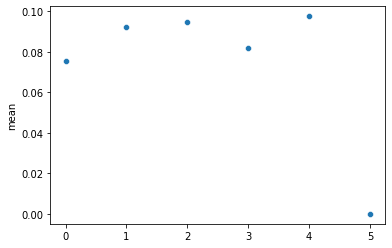

In [25]:
import seaborn as sns

sns.scatterplot(x=list(range(6)), y=grouped_by_children['debt']['mean'])


As can be seen in the graph, in general there is an increase in debtors depending on the number of children in the family. But debtors with three and five children are out of the trend. The reason may be that there is too little data on such debtors and they do not reflect reality. For example, if in the data there was one bank client with no debt and with six children, then his average would be equal to 0 and he would be out of the trend in the same way. If there were 5,000 of the same clients, then the average would be higher and, perhaps, would confirm the trend.

In [26]:
large_family_count = len(data[data['children'].isin([3, 4, 5])])
large_family_ratio = large_family_count / len(data)
print('Действительно, таких данных всего {}, что составляет {:.2%} от всей выборки.'.format(large_family_count, large_family_ratio))


Действительно, таких данных всего 380, что составляет 1.78% от всей выборки.


Perhaps the trend depends not only on the number of children in the family, but also on the type of family. To test this hypothesis, we first obtain a dictionary of family statuses and their ids. Then we will create a summary table on the average number of debtors in families of different statuses and number of children. Next, we’ll build a heatmap and check whether the trend continues. For accuracy, you can remove data on large families from the heatmap, since there are too few of them.

In [27]:
status_dict = pd.crosstab(data['family_status'], data['family_status_id'])
status_dict


family_status_id,0,1,2,3,4
family_status,,,,,
Не женат / не замужем,0,0,0,0,2796
в разводе,0,0,0,1189,0
вдовец / вдова,0,0,951,0,0
гражданский брак,0,4134,0,0,0
женат / замужем,12261,0,0,0,0


In [28]:
pivoted_by_children = data[data['children'].isin([0, 1, 2])].pivot_table(index='children', columns='family_status_id', values='debt', aggfunc='mean')
pivoted_by_children


family_status_id,0,1,2,3,4
children,,,,,
0,0.069095,0.083883,0.062574,0.070153,0.092838
1,0.082689,0.118593,0.090909,0.067308,0.115813
2,0.094586,0.087464,0.150000,0.086420,0.120000


<AxesSubplot:xlabel='family_status_id', ylabel='children'>

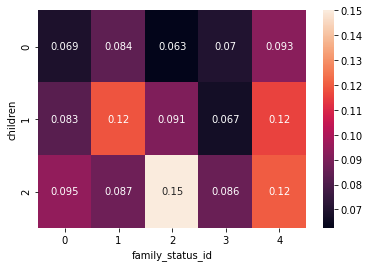

In [29]:
sns.heatmap(pivoted_by_children, annot=True)


Data on debtors with different numbers of children in the family are indeed a little heterogeneous depending on the status of the family.

For married borrowers, the trend continues.

For bank clients who are in a civil marriage, the percentage of debtors is higher for a family with one child than for a childless family or a family with two children.

Widows/widowers with children are more likely to become debtors. For them, the trend also remains and is more clearly expressed.

Divorced borrowers also have difficulty paying off debt, especially if they have children.

For bank clients who are single or unmarried, the trend is clearly visible. Moreover, the shares of debtors in this category are significantly higher compared to other categories.

Let's check why, in this sample, bank clients with one child often become debtors. Perhaps they often take out a loan to celebrate their wedding and have difficulty repaying this particular debt.

In [30]:
data[(data['children'].isin([0, 1, 2])) & (data['family_status_id'] == 1)].pivot_table(
                                        index='purpose_category', columns='children', values='debt', aggfunc=['sum', 'count'])


sum         count          
children                    0   1   2     0    1    2
purpose_category                                     
операции с автомобилем     28  17   4   282  106   35
операции с недвижимостью   51  32   8   649  261   61
получение образования      35  18   6   269   96   32
проведение свадьбы        115  51  12  1530  532  215

The most common loan among borrowers in a civil marriage with one child is actually holding a wedding. A larger number of debtors in a civil marriage took out a loan for the wedding.

**Conclusion:** indeed, the more children in the borrower’s family, the higher the risk of not repaying the loan on time. This is especially pronounced among bank clients who are widowers or have never been married.

**Is there a relationship between marital status and repayment of the loan on time?**

In [31]:
grouped_by_family = data.groupby('family_status_id').agg({'debt': 'mean'})
grouped_by_family


,debt
family_status_id,
0,0.075606
1,0.093130
2,0.066246
3,0.070648
4,0.097639


<AxesSubplot:ylabel='debt'>

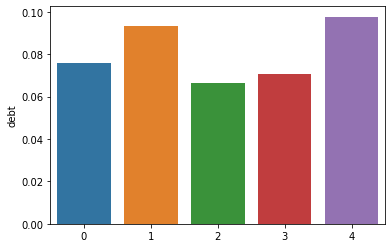

In [32]:
sns.barplot(x=list(range(5)), y=grouped_by_family['debt'])


Above, the data has been grouped by borrower family category. For each category, the share of debtors was calculated. It turns out that the average number of debtors in each subgroup of the sample is different. Borrowers who are in a common-law marriage or who are single are more likely to become debtors than those who are or have been in a formal marriage.

**Conclusion:** it is possible that there is a relationship between marital status and repayment of the loan on time. Sample data show that ever-married borrowers are less likely to become debtors.

**Is there a relationship between income level and loan repayment on time?**

In [33]:
grouped_by_income = data.groupby('total_income_category').agg({'debt': 'mean'})
grouped_by_income


,debt
total_income_category,
A,0.080000
B,0.070602
C,0.084982
D,0.060172
E,0.090909


<AxesSubplot:ylabel='debt'>

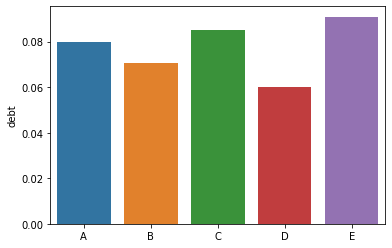

In [34]:
sns.barplot(x=['A', 'B', 'C', 'D', 'E'], y=grouped_by_income['debt'])


Let's see how many borrowers and debtors are in each class. The table below shows that there are not many borrowers with high or low income in the sample. You could try to categorize the 'total_income' column so that there are approximately equal numbers of borrowers in each category. Below is a summary table of the changed categories. Indeed, in general, the risk of becoming a debtor is lower for clients with earnings of 170,000 or more

In [105]:
debtors_by_income = data.groupby('total_income_category').agg({'debt': ['sum', 'count', 'mean']})
debtors_by_income

debt                 
                        sum  count      mean
total_income_category                       
A                         2     25  0.080000
B                       354   5014  0.070602
C                      1353  15921  0.084982
D                        21    349  0.060172
E                         2     22  0.090909

In [103]:
def income_category(income):
    if 0 <= income <= 100000:
        return 'e'
    elif 100001 <= income <= 135000:
        return 'd'
    elif 135001 <= income <= 170000:
        return 'c'
    elif 170001 <= income <= 230000:
        return 'b'
    elif income >= 230001:
        return 'a'

data['income_category'] = data['total_income'].apply(income_category)
debtors_by_income_upd = data.groupby('income_category').agg({'debt': ['sum', 'count', 'mean']})
debtors_by_income_upd.sort_values(by=('debt', 'mean'))


debt                
                 sum count      mean
income_category                     
a                243  3497  0.069488
b                331  4180  0.079187
e                354  4444  0.079658
d                373  4432  0.084161
c                431  4778  0.090205

**How do different purposes of a loan affect its repayment on time?**

In [330]:
grouped_by_purpose = data.groupby('purpose_category').agg({'debt': 'mean'})
grouped_by_purpose


,debt
purpose_category,
операции с автомобилем,0.093480
операции с недвижимостью,0.072551
получение образования,0.092528
проведение свадьбы,0.079118


<AxesSubplot:ylabel='debt'>

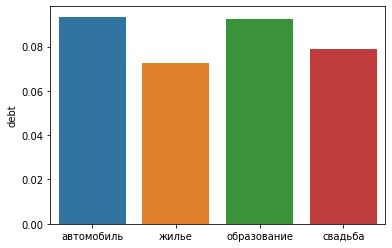

In [334]:
sns.barplot(x=['автомобиль', 'жилье', 'образование', 'свадьба'], y=grouped_by_purpose['debt'], )


**Conclusion:** the share of debtors is greatest in the categories of “transactions with a car” and “obtaining education”.

**Give possible reasons for the appearance of missing values in the source data**

*Answer:* possible reasons for the appearance of gaps in the source data can be explained by human factor or an error when unloading data.

**Explain why imputing with the median is the best solution for quantitative variables**

*Answer:* Imputing with the median value is the best solution for quantitative variables because it characterizes the sample better than others. The arithmetic mean is sensitive to outliers in the data, while the median is more robust.

## Conclusion

Repayment of the loan on time depends on the type of family and the number of children in the borrower’s family. The more children you have, the higher the risk of becoming a debtor. This is especially pronounced among such groups of borrowers as widows and singles. Bank clients who have ever been officially married are more likely to repay the loan on time. An income level of 170,000 or more in this sample reduced the risk of becoming a debtor. Loan purposes “operating with a car” and “education” more than others cause difficulties in repayment for borrowers.